# Visualization of VVR groups 
Everything you need to know about matplotlib can be find in its documentation: https://matplotlib.org/stable/

In [1]:
%matplotlib inline 
import numpy
import pandas
import matplotlib.pyplot as plt

In [2]:
clean_donor_info = pandas.read_csv('/Users/dionnespaltman/Desktop/V3/processed_donor_info.csv')
VVR_scores_final = pandas.read_csv('/Users/dionnespaltman/Desktop/V3/VVR_scores_final.csv')

## 1st graph 
- On the y-axis the number of donors.
- On the x-axis the VVR during and post donation scores (stages 4, 5, 6, 7). 
- Bar graph with condition. 
- Adding a dotted graph where the mean is (mean = 30.515625)

Chat GPT input: 
I have a dataframe called VVR_scores_final. I want to create a bar chart with on x-axis the VVR score (this is the column sum_4567). The x-axis should go from approximately 30 to 100 (so this is the VVR score). The y-axis is the number of donors with a certain score. Then I want to divide the bars into 3 parts, depending on the Condition (1, 2 or 3). It should all be done using matplotlib. 

In [6]:
clean_donor_info = pandas.read_csv('/Users/dionnespaltman/Desktop/V3/processed_donor_info.csv')
VVR_scores_final = pandas.read_csv('/Users/dionnespaltman/Desktop/V3/VVR_scores_final.csv')

In [7]:
display(VVR_scores_final)

,Unnamed: 0.1,Unnamed: 0,ID,sum_12,sum_4567,sum_456,VVR_group,Condition
0,0,0,5,22.0,34.0,26.0,0,1
1,7,7,6,16.0,32.0,24.0,0,2
2,14,14,7,23.0,77.0,65.0,1,2
3,21,21,8,17.0,32.0,24.0,0,1
4,28,28,9,16.0,32.0,24.0,0,1
...,...,...,...,...,...,...,...,...
315,2019,2019,328,20.0,35.0,27.0,0,3
316,2025,2025,329,18.0,35.0,27.0,0,3
317,2031,2031,330,23.0,35.0,26.0,0,3
318,2037,2037,331,28.0,38.0,30.0,0,3


In [8]:
# Assuming VVR_scores_final is your DataFrame and 'sum_12' is the column containing VVR sum scores

# Calculate the minimum and maximum values of the column
min_value = VVR_scores_final['sum_12'].min()
max_value = VVR_scores_final['sum_12'].max()

print("Range of 'sum_12' column:")
print("Minimum value:", min_value)
print("Maximum value:", max_value)


Range of 'sum_12' column:
Minimum value: 16.0
Maximum value: 42.0


/var/folders/_4/nzq6mygj7j71_l3z_c9kc7wr0000gn/T/ipykernel_16411/2735652508.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


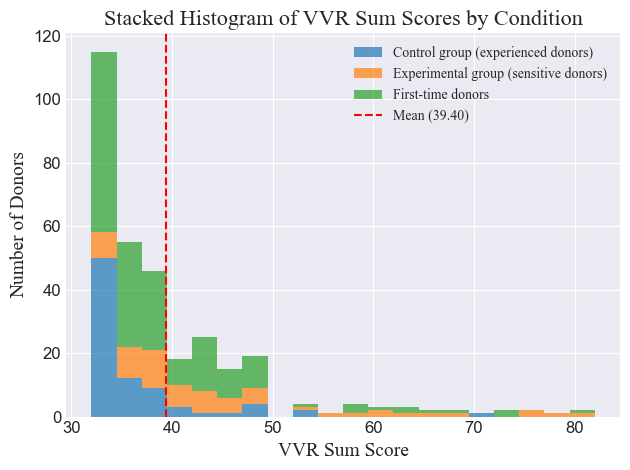

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')

# Assuming VVR_scores_final is your DataFrame and 'sum_4567' is the column containing VVR sum scores

# Filter the DataFrame to include only rows with VVR sum scores between 10 and 100
filtered_df = VVR_scores_final[(VVR_scores_final['sum_4567'] >= 10) & (VVR_scores_final['sum_4567'] <= 100)]

# Create a stacked histogram
plt.hist([filtered_df[filtered_df['Condition'] == 1]['sum_4567'],
          filtered_df[filtered_df['Condition'] == 2]['sum_4567'],
          filtered_df[filtered_df['Condition'] == 3]['sum_4567']],
         bins=20, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7, stacked=True,
         label=['Control group (experienced donors)',
                'Experimental group (sensitive donors)',
                'First-time donors'])
# Add a vertical dotted line for the mean
mean_value = 39.4
plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean ({mean_value:.2f})')

# Set labels and title
plt.xlabel('VVR Sum Score', fontsize=14, fontname='Times New Roman')
plt.ylabel('Number of Donors', fontsize=14, fontname='Times New Roman')
plt.title('Stacked Histogram of VVR Sum Scores by Condition', fontsize=16, fontname='Times New Roman')

# Add legend with Times New Roman font
plt.legend(prop={'family': 'Times New Roman'})

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Increase the font size of ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## 2nd graph 
- On the x-axis the 'Stage'. There should be 7 times 3 box plots. So three plots per each stage. The three plots are one per Condition (1 = control, 2 = experimental and 3 = sensitive)/ 
- On the y-axis the VVR ratings. 
- clean_donor_info is the dataframe where all the information is.  

In [11]:
display(clean_donor_info)

,Unnamed: 0,Index,ID,Stage,Gender,Age,Date,Location,Condition,Weight,...,Weakness,Lightheadedness,Fear,Tension,Stress,Nervousness,Physical_sum,Psychological_sum,na.rm,sum_VVR
0,0,0,5,1.0,2,33.0,2019-10-21,0,1,74.0,...,1.0,1.0,2.0,2.0,2.0,2.0,4.0,8.0,True,12.0
1,1,1,5,2.0,2,33.0,2019-10-21,0,1,74.0,...,1.0,1.0,1.0,2.0,1.0,2.0,4.0,6.0,True,10.0
2,2,2,5,3.0,2,33.0,2019-10-21,0,1,74.0,...,1.0,1.0,1.0,2.0,1.0,2.0,4.0,6.0,True,10.0
3,3,3,5,4.0,2,33.0,2019-10-21,0,1,74.0,...,1.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,True,9.0
4,4,4,5,5.0,2,33.0,2019-10-21,0,1,74.0,...,1.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,True,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2044,2052,332,2.0,2,21.0,2022-12-19,3,2,66.0,...,1.0,1.0,2.0,3.0,3.0,4.0,4.0,12.0,True,16.0
2045,2045,2053,332,4.0,2,21.0,2022-12-19,3,2,66.0,...,1.0,1.0,3.0,3.0,3.0,5.0,4.0,14.0,True,18.0
2046,2046,2054,332,5.0,2,21.0,2022-12-19,3,2,66.0,...,1.0,1.0,2.0,3.0,3.0,4.0,4.0,12.0,True,16.0
2047,2047,2055,332,6.0,2,21.0,2022-12-19,3,2,66.0,...,1.0,1.0,2.0,2.0,2.0,3.0,4.0,9.0,True,13.0


/var/folders/_4/nzq6mygj7j71_l3z_c9kc7wr0000gn/T/ipykernel_16411/339022101.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


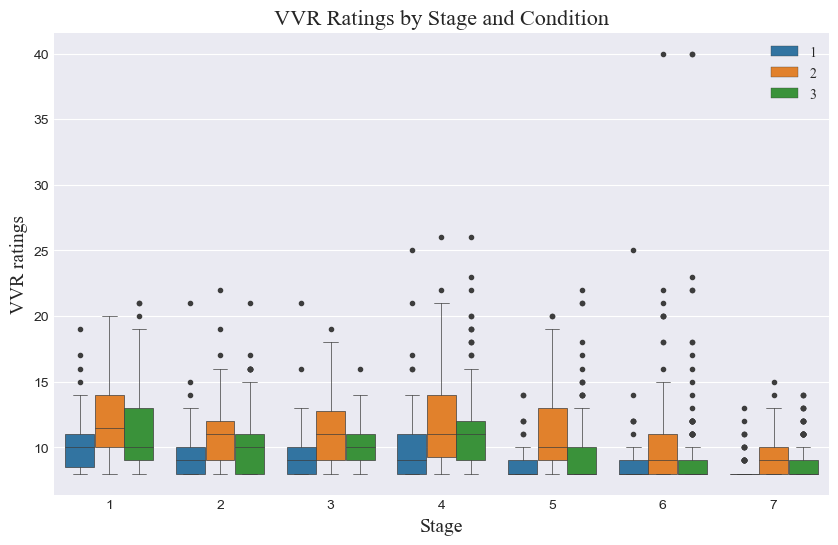

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clean_donor_info is your DataFrame containing the necessary data

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the order of conditions
condition_order = [1, 2, 3]

# Plot boxplots for each stage and condition
sns.boxplot(x='Stage', y='sum_VVR', hue='Condition', data=clean_donor_info, order=range(1, 8), hue_order=condition_order, linewidth=0.5, flierprops=dict(marker='o', markersize=3))

# Move the legend to the right of the graph
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels for x-axis and y-axis and title
plt.xlabel('Stage', fontsize=14, fontname='Times New Roman')
plt.ylabel('VVR ratings',  fontsize=14, fontname='Times New Roman')
plt.title('VVR Ratings by Stage and Condition', fontsize=16, fontname='Times New Roman')

# Add legend with Times New Roman font
plt.legend(prop={'family': 'Times New Roman'})

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


## 3rd graph 